In [2]:
import tensorflow as tf
import os

In [3]:
os.listdir('archive')

['test', 'train']

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
len(gpus)

0

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
import cv2
import imghdr

## Load the traing Data

In [18]:
data='C:/Users/Lenovo/OneDrive/Documents/Computer vision/archive/train'

In [11]:
os.listdir(data)

['apples', 'tomatoes']

### Load the apples folder in data

In [12]:
os.listdir(os.path.join(data,'apples'))

['img_p1_10.jpeg',
 'img_p1_100.jpeg',
 'img_p1_107.jpeg',
 'img_p1_109.jpeg',
 'img_p1_11.jpeg',
 'img_p1_113.jpeg',
 'img_p1_115.jpeg',
 'img_p1_117.jpeg',
 'img_p1_119.jpeg',
 'img_p1_12.jpeg',
 'img_p1_123.jpeg',
 'img_p1_125.jpeg',
 'img_p1_129.jpeg',
 'img_p1_13.jpeg',
 'img_p1_135.jpeg',
 'img_p1_137.jpeg',
 'img_p1_141.jpeg',
 'img_p1_144.jpeg',
 'img_p1_17.jpeg',
 'img_p1_18.jpeg',
 'img_p1_20.jpeg',
 'img_p1_21.jpeg',
 'img_p1_22.jpeg',
 'img_p1_23.jpeg',
 'img_p1_24.jpeg',
 'img_p1_25.jpeg',
 'img_p1_28.jpeg',
 'img_p1_31.jpeg',
 'img_p1_32.jpeg',
 'img_p1_35.jpeg',
 'img_p1_37.jpeg',
 'img_p1_38.jpeg',
 'img_p1_39.jpeg',
 'img_p1_4.jpeg',
 'img_p1_40.jpeg',
 'img_p1_41.jpeg',
 'img_p1_42.jpeg',
 'img_p1_44.jpeg',
 'img_p1_46.jpeg',
 'img_p1_48.jpeg',
 'img_p1_5.jpeg',
 'img_p1_57.jpeg',
 'img_p1_59.jpeg',
 'img_p1_6.jpeg',
 'img_p1_61.jpeg',
 'img_p1_63.jpeg',
 'img_p1_65.jpeg',
 'img_p1_67.jpeg',
 'img_p1_72.jpeg',
 'img_p1_78.jpeg',
 'img_p1_80.jpeg',
 'img_p1_86.jpeg',
 

In [13]:
image_exta=['jpeg','jpg','bmp','png']

In [14]:
for image_class in os.listdir(data):
    print(image_class)

apples
tomatoes


In [15]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data,image_class)):
        image_path=os.path.join(data,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exta:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
                

# Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 294 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

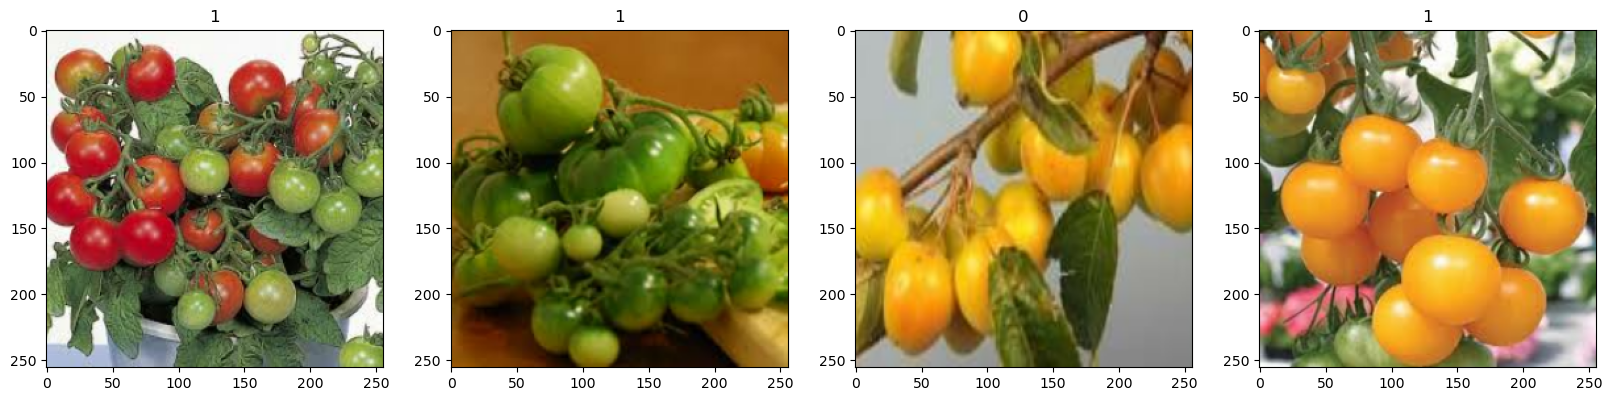

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [24]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# Split Data

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train_size

7

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build the model

In [28]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [30]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [33]:
logdir='logs'


In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 72s 6s/step - loss: 0.7966 - accuracy: 0.5223 - val_loss: 0.6165 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.6495 - accuracy: 0.6339 - val_loss: 0.6002 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.6025 - accuracy: 0.6562 - val_loss: 0.6713 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.5830 - accuracy: 0.6696 - val_loss: 0.5164 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.5055 - accuracy: 0.7902 - val_loss: 0.5229 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.4834 - accuracy: 0.7857 - val_loss: 0.4671 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.4219 - accuracy: 0.8348 - val_loss: 0.4498 - val_accuracy: 0.7500
Epoch 8/20
7/7 [==================

# Plot performance

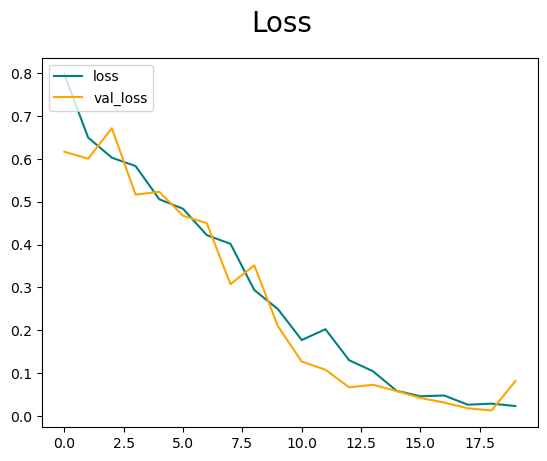

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

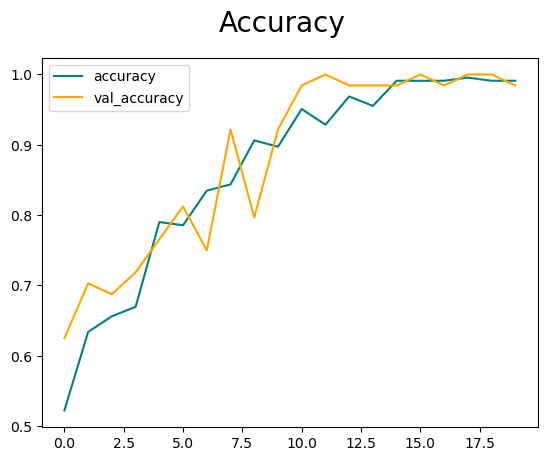

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 1s 696ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Test

In [42]:
import cv2

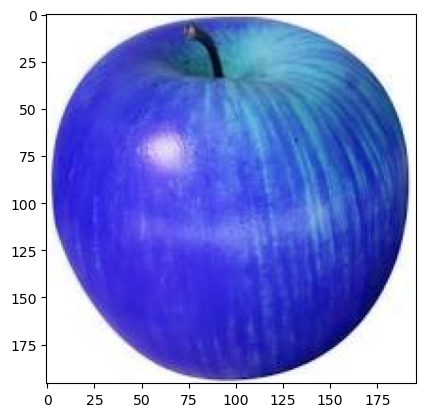

In [44]:
img = cv2.imread('C:/Users/Lenovo/OneDrive/Documents/Computer vision/archive/train/apples/img_p1_22.jpeg')
plt.imshow(img)
plt.show()


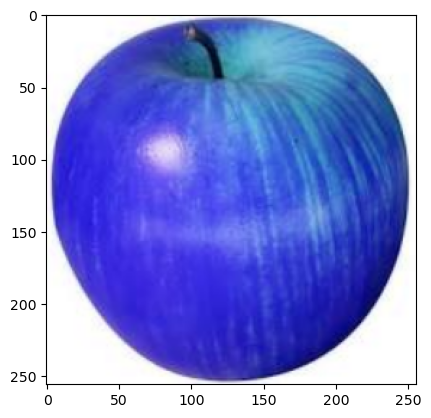

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 102ms/step


In [47]:
yhat



array([[5.4999197e-07]], dtype=float32)

In [48]:
if yhat > 0.5: 
    print(f'Predicted class is Tomatoo')
else:
    print(f'Predicted class is Apple')

Predicted class is Apple


# Save the model

In [49]:
from tensorflow.keras.models import load_model


In [54]:
model.save(os.path.join('imageclassifier.h5'))


In [55]:
new_model = load_model('imageclassifier.h5')


In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 308ms/step


array([[5.4999197e-07]], dtype=float32)